### KNN Density Estimation

### Q1: implement density estimation using the K-NN method. 

#### Data Preparation

Obtain an iid sample of N ≥ 1 points from a univariate normal (Gaussian) distribution (let us call the random variable X) centered at 1 and with variance 2

#### Density Estimation

Now, empirically obtain an estimate of the density from the sample points using the K-NN method, for any value of K, where 1 ≤ K ≤ N.

Produce one plot for each of the following cases 

(each plot should show the following three items: 
- the N data points (instances or realizations of X) and 
- the true and estimated densities versus x for a large number – e.g., 1000, 10000
– of discrete, linearly-spaced x values): 

(i) K = N = 1, 

(ii) K = 2, N = 10, 

(iii) K = 10, N=10,

(iv)K=10,N=1000,

(v)K=100,N=1000,

(vi)K=N=50,000. 

Please provide appropriate axis labels and legends. 

Thus there should be a total of six figures
(plots), each figure similar to Fig. 8 on p. 20 of the pdf notes.


In [244]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [361]:
def density_estimation_knn(N, K, 
                          mean_value=1,variance_val=2, seed_value=12,
                          n_linearly_spaced_discrete_values=1000):
    
    np.random.seed(seed_value)
    # variance = square(standard_deviation)
    # scale is standard deviation
    # hence sqrt(variance_value) = scale/standard_deviation
    gaussian = norm(loc=mean_value, scale=math.sqrt(variance_val))
    
    # input data is X
    input_data = gaussian.rvs(N)
    #input_data = np.random.normal(loc=mean_value, scale=math.sqrt(variance_val), size=N)
    print("Distribution Stats:")
    print("Size: ", len(input_data),
         "X-Min: ", input_data.min(), "X-Max: ", input_data.max())
    
    linearly_spaced_discrete_values = np.linspace(start=-8, 
                                                  stop=8, 
                                                  num=n_linearly_spaced_discrete_values)
    
    print("n_linearly_spaced_discrete_values: ", len(linearly_spaced_discrete_values))
    
    N = len(input_data)
    probabilities = np.zeros_like(linearly_spaced_discrete_values)
    
    fig, axes = plt.subplots(1,1, figsize=(8, 5))
    for index, x_discrete_val in enumerate(linearly_spaced_discrete_values):
        distances = np.abs(input_data - x_discrete_val)
        neighbor_indices_of_sorted_distances = distances.argsort()
        kth_neighbor_distance = neighbor_indices_of_sorted_distances[K-1]
        """
        dV = πd/2/Γ(d2 +1)rd 
        f(x) = K/N * 1/dV
        
        where Γ(·) indicates the gamma function. (Recap: For a positive integer n, 
        Γ(n) = (n − 1)! and Γ(1) = √π, Γ(3) = 1√π, etc.) (Verify: the volume of a
        sphere (d = 3) is 4πr3; the area
         22
         
        When d=1, dV = 2 * rd
        """
        dV = (2 * distances[kth_neighbor_distance])
        probabilities[index] =  (K/N) * 1/dV
        # (K/n) * 1/(2 * dists[neighbour_K])
        
    line1, = axes.plot(linearly_spaced_discrete_values, gaussian.pdf(linearly_spaced_discrete_values))
    line2, = axes.plot(linearly_spaced_discrete_values, probabilities)
    points3, = axes.plot(input_data, np.zeros_like(input_data), 'bo', color='black')
    axes.set_title(f"K-NN density estimation K={K},N={N}")
    axes.set_xlabel("Discrete linearly spaced x values")
    axes.legend([line1, line2, points3], ['True (unknown) density', 'Estimated density', 'Training points'])

##### case-1

Distribution Stats:
Size:  1 X-Min:  -0.535313522914939 X-Max:  -0.535313522914939
n_linearly_spaced_discrete_values:  1000


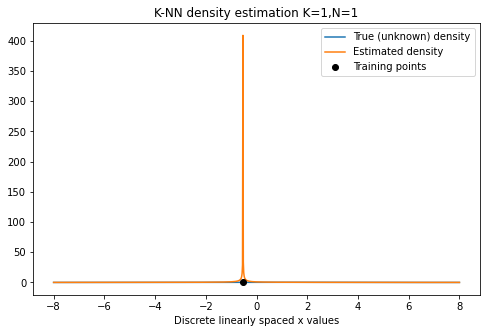

In [362]:
density_estimation_knn(N=1,K=1,
                       mean_value=1,variance_val=2, seed_value=123,
                       n_linearly_spaced_discrete_values=1000)

# Note that variance will be 0 for N=1

##### case-2:

Distribution Stats:
Size:  10 X-Min:  -0.8364567882597602 X-Max:  3.623439963332321
n_linearly_spaced_discrete_values:  1000


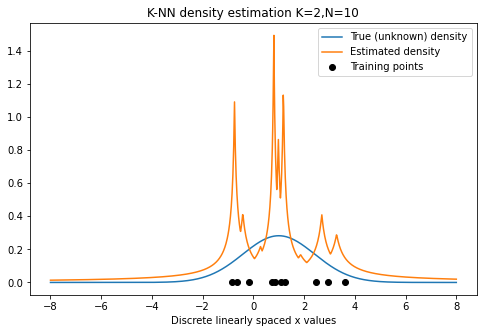

In [363]:
density_estimation_knn(N=10,K=2,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case-3

Distribution Stats:
Size:  10 X-Min:  -0.8364567882597602 X-Max:  3.623439963332321
n_linearly_spaced_discrete_values:  1000


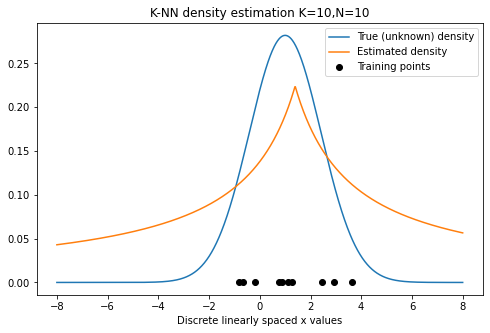

In [364]:
density_estimation_knn(N=10,K=10,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case-4

Distribution Stats:
Size:  1000 X-Min:  -3.627026934137941 X-Max:  5.6367665290810764
n_linearly_spaced_discrete_values:  1000


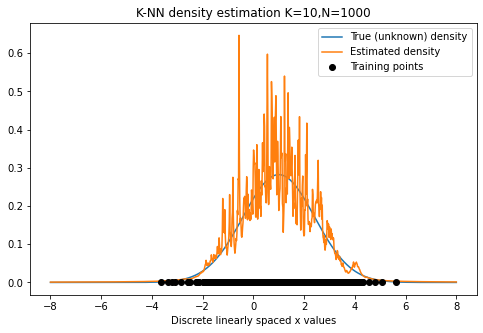

In [365]:
density_estimation_knn(N=1000,K=10,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case 5

Distribution Stats:
Size:  1000 X-Min:  -3.627026934137941 X-Max:  5.6367665290810764
n_linearly_spaced_discrete_values:  1000


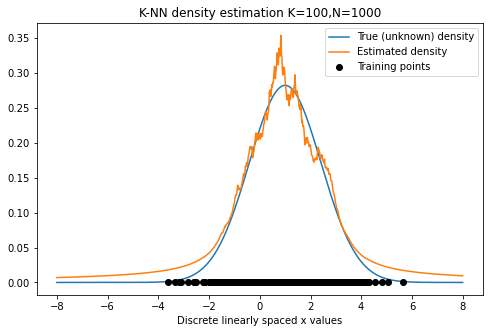

In [366]:
density_estimation_knn(N=1000,K=100,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case 6

Distribution Stats:
Size:  50000 X-Min:  -4.515991233558055 X-Max:  7.109242012764549
n_linearly_spaced_discrete_values:  1000


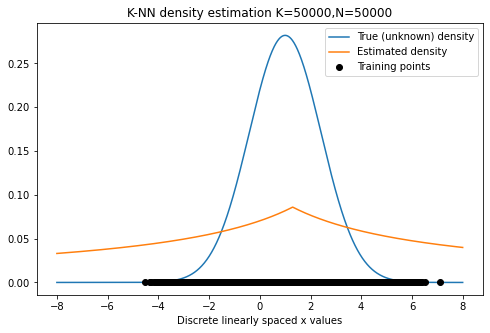

In [367]:
density_estimation_knn(N=50000,K=50000,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)